In [2]:
import pandas as pd
import numpy as np
import json
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
def hazard_ratio(theta, alpha, miu, v, concentration):
    z = (concentration-2.4) if (concentration - 2.4) > 0 else 0
    numerator = theta * np.log(z/(alpha)+1)
    denominator = 1 + np.exp(-(z-miu)/v)
    GEMM = np.exp(numerator/denominator)
    return GEMM 
def hazard_ratio_NCDLRI(concentration):
    if concentration < 2.4: # Lowest observed concentration in any of the 41 cohorts
        return 1
    else:
        return hazard_ratio(0.1430, 1.6, 15.5, 36.8, concentration)

# Check whether
<br>
## wholewolrd concentrations = summation of all countries' concentrations

In [4]:
# summation of all countries' concentrations
concentration_consumption = pd.read_csv('C:/Users/15311/Desktop/concentration_matrix.csv',header=None)

In [5]:
concentration_consumption

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,5.359969e-08,3.537154e-08,0.000003,2.722943e-08,0.000002,3.806444e-09,0.000022,3.311551e-08,8.583286e-09,0.000003,...,0.000030,6.637447e-07,7.996932e-07,3.975315e-09,0.000029,4.720066e-07,4.040659e-07,5.417890e-07,2.779242e-07,0.0
1,5.834354e-08,3.816871e-08,0.000004,3.136729e-08,0.000002,3.773725e-09,0.000017,3.663019e-08,8.687873e-09,0.000003,...,0.000033,4.468515e-07,9.383544e-07,3.807891e-09,0.000032,5.413872e-07,4.331538e-07,3.842346e-07,1.829711e-07,0.0
2,8.065263e-08,5.209372e-08,0.000006,4.663887e-08,0.000003,4.400378e-09,0.000012,5.097777e-08,1.046453e-08,0.000005,...,0.000045,2.748242e-07,1.425254e-06,4.319701e-09,0.000043,8.016187e-07,5.742822e-07,2.864733e-07,1.216361e-07,0.0
3,7.728184e-08,4.984932e-08,0.000006,4.528505e-08,0.000003,4.085611e-09,0.000009,4.893945e-08,9.762127e-09,0.000005,...,0.000044,1.920005e-07,1.388792e-06,3.972079e-09,0.000041,7.775619e-07,5.498045e-07,2.263148e-07,9.102658e-08,0.0
4,1.799151e-07,1.156564e-07,0.000014,1.072149e-07,0.000006,9.029982e-09,0.000016,1.139250e-07,2.180575e-08,0.000012,...,0.000102,3.138425e-07,3.303126e-06,8.733737e-09,0.000095,1.839831e-06,1.263305e-06,4.242226e-07,1.617730e-07,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273734,6.167611e-04,2.770478e-04,0.017140,1.626795e-04,0.007623,4.023941e-05,0.019119,2.808095e-04,7.610923e-05,0.256499,...,0.299570,7.605781e-04,4.341694e-03,3.069543e-04,0.110664,1.195531e-02,1.999765e-03,9.744218e-04,5.156231e-04,0.0
273735,1.864484e-03,8.346772e-04,0.049146,4.807639e-04,0.021807,1.232206e-04,0.054527,8.415082e-04,2.311686e-04,0.541844,...,0.897237,1.996215e-03,1.267580e-02,1.011910e-03,0.319331,3.602883e-02,5.668469e-03,2.528534e-03,1.229702e-03,0.0
273736,2.478675e-03,1.098999e-03,0.062864,6.222474e-04,0.027783,1.645512e-04,0.069724,1.106632e-03,3.069772e-04,0.702797,...,1.180493,2.608247e-03,1.627010e-02,1.382851e-03,0.407455,4.830983e-02,7.344652e-03,3.290704e-03,1.592518e-03,0.0
273737,3.006812e-03,1.327771e-03,0.075307,7.479158e-04,0.033223,1.997889e-04,0.083432,1.334968e-03,3.718337e-04,0.844055,...,1.420911,3.141515e-03,1.950420e-02,1.689412e-03,0.487757,5.865929e-02,8.839924e-03,3.955133e-03,1.901830e-03,0.0


In [6]:
# wholewolrd concentrations
fraction = gpd.read_file('C:/Users/15311/Desktop/output_wholeworld/wholeworld_agr.shp')
A = ['ene','ind','nrtr','rcor','rcoc','rcoo','shp','slv','wst']
for j in A:
    read_shp = gpd.read_file(r'C:/Users/15311/Desktop/output_wholeworld/wholeworld_' + j + '.' + 'shp')
    fraction['TotalPM25'] += read_shp['TotalPM25']

In [19]:
country_classify = pd.read_csv('C:/Users/15311/Desktop/baseline_fraction_Hbar2_new.csv',header=0)

In [20]:
country_classify = country_classify[['geometry','new_area_fraction','mort_per_con']]

In [21]:
country_classify['summation_countries_pm25'] = concentration_consumption.sum(axis=1)

In [22]:
country_classify['wholeworld_pm25'] = fraction['TotalPM25']

In [23]:
country_classify['difference'] = country_classify['summation_countries_pm25'] - country_classify['wholeworld_pm25']

In [25]:
country_classify['diff_percent'] = abs(country_classify['difference']/country_classify['summation_countries_pm25'])*100

In [41]:
country_classify

,geometry,new_area_fraction,mort_per_con,summation_countries_pm25,wholeworld_pm25,difference,diff_percent
0,"POLYGON ((-180 -88, -175 -88, -175 -84, -180 -...",{'ROW': 1},{'ROW': 0.0},0.000391,0.000356,0.000036,9.114951
1,"POLYGON ((-180 -84, -175 -84, -175 -80, -180 -...",{'ROW': 1},{'ROW': 0.0},0.000410,0.000381,0.000029,7.012391
2,"POLYGON ((-180 -80, -175 -80, -175 -76, -180 -...",{'ROW': 1},{'ROW': 0.0},0.000542,0.000528,0.000015,2.721156
3,"POLYGON ((-180 -76, -175 -76, -175 -72, -180 -...",{'ROW': 1},{'ROW': 0.0},0.000515,0.000505,0.000010,1.898113
4,"POLYGON ((-180 -72, -175 -72, -175 -68, -180 -...",{'ROW': 1},{'ROW': 0.0},0.001187,0.001180,0.000007,0.622367
...,...,...,...,...,...,...,...
273734,"POLYGON ((174.921875 -41.1875, 175 -41.1875, 1...",{'NZL': 1.0},{'NZL': 0.038847976516965255},5.776610,5.201578,0.575032,9.954493
273735,"POLYGON ((174.921875 -37.125, 175 -37.125, 175...",{'NZL': 1.0},{'NZL': 0.04414859945588974},16.763617,13.373469,3.390148,20.223249
273736,"POLYGON ((174.921875 -37.0625, 175 -37.0625, 1...",{'NZL': 1.0},{'NZL': 0.03961047928311932},22.581054,18.203686,4.377368,19.385136
273737,"POLYGON ((174.921875 -37, 175 -37, 175 -36.937...",{'NZL': 1.0},{'NZL': 0.016314127124696952},27.622078,22.344492,5.277586,19.106404


In [34]:
diff_country = country_classify[(country_classify['diff_percent']>=1) & (country_classify['summation_countries_pm25']>=2.4)].reset_index(drop=True)

In [35]:
diff_country

,geometry,new_area_fraction,mort_per_con,summation_countries_pm25,wholeworld_pm25,difference,diff_percent
0,"POLYGON ((-145 12, -140 12, -140 16, -145 16, ...",{'ROW': 1},{'ROW': 0.0},2.458564,2.420488,0.038076,1.548692
1,"POLYGON ((-140 4, -135 4, -135 8, -140 8, -140...",{'ROW': 1},{'ROW': 0.0},2.404196,2.306084,0.098111,4.080837
2,"POLYGON ((-140 8, -135 8, -135 12, -140 12, -1...",{'ROW': 1},{'ROW': 0.0},2.431685,2.360542,0.071142,2.925638
3,"POLYGON ((-140 12, -135 12, -135 16, -140 16, ...",{'ROW': 1},{'ROW': 0.0},2.491793,2.454322,0.037471,1.503759
4,"POLYGON ((-135 4, -130 4, -130 8, -135 8, -135...",{'ROW': 1},{'ROW': 0.0},2.789439,2.666814,0.122625,4.396053
...,...,...,...,...,...,...,...
3731,"POLYGON ((174.921875 -41.1875, 175 -41.1875, 1...",{'NZL': 1.0},{'NZL': 0.038847976516965255},5.776610,5.201578,0.575032,9.954493
3732,"POLYGON ((174.921875 -37.125, 175 -37.125, 175...",{'NZL': 1.0},{'NZL': 0.04414859945588974},16.763617,13.373469,3.390148,20.223249
3733,"POLYGON ((174.921875 -37.0625, 175 -37.0625, 1...",{'NZL': 1.0},{'NZL': 0.03961047928311932},22.581054,18.203686,4.377368,19.385136
3734,"POLYGON ((174.921875 -37, 175 -37, 175 -36.937...",{'NZL': 1.0},{'NZL': 0.016314127124696952},27.622078,22.344492,5.277586,19.106404


In [36]:
diff_country['country_area'] = [{} for i in range(len(diff_country))]
diff_country['country_death'] = [{} for i in range(len(diff_country))]
diff_country = gpd.GeoDataFrame(diff_country)

In [49]:
sum(diff_country['summation_countries_pm25'])

63661.200361549905

In [37]:
# Calculate the influenced area/number of death of each country
import shapely.wkt
for i in range(len(diff_country)):
    area_fraction = json.loads(diff_country.iloc[i]['new_area_fraction'].replace('\'','\"'))
    mort_per_con = json.loads(diff_country.iloc[i]['mort_per_con'].replace('\'','\"'))
    for country in area_fraction:
        diff_country.iloc[i]['country_death'][country] = area_fraction[country] * mort_per_con[country] * diff_country.iloc[i]['difference']
        diff_country.iloc[i]['country_area'][country] = area_fraction[country] * shapely.wkt.loads(diff_country.iloc[0].geometry).area

In [38]:
# Calculate the sum of several dictionaries
import collections, functools, operator
countries_area = dict(functools.reduce(operator.add,
         map(collections.Counter, list(diff_country['country_area']))))
countries_death_diff = dict(functools.reduce(operator.add,
         map(collections.Counter, list(diff_country['country_death']))))

In [39]:
countries_area

{'ROW': 1880.0,
 'MEX': 20.0,
 'FRA': 467.6827452470179,
 'ECU': 992.3984276502304,
 'CRI': 43.75713220948302,
 'PER': 68.15183270761582,
 'COL': 20972.999303957586,
 'PAN': 23.380375652084048,
 'VEN': 341.90296770068363,
 'ARG': 1781.0702200174967,
 'GBR': 63.26544722642306,
 'ATG': 35.79230820235739,
 'TTO': 48.98331032808987,
 'BRB': 204.13750036574262,
 'GUY': 57.32162880940082,
 'PRY': 590.2482731838805,
 'SUR': 47.88916568292035,
 'BRA': 13479.18847107143,
 'CAN': 40.0,
 'GRL': 39.29944396921737,
 'DNK': 71.72193485793392,
 'ISL': 137.06071514273455,
 'IRL': 9.117721962548947,
 'SLE': 21.729164735817232,
 'GIN': 218.88860346771506,
 'LBR': 59.38223179646771,
 'NOR': 2518.3030726224047,
 'NLD': 8082.1612010189665,
 'BEL': 919.9348063900497,
 'NGA': 3151.629369247192,
 'DEU': 320.6358621108436,
 'CMR': 2514.902651296652,
 'SWE': 1304.335131315858,
 'COG': 336.05765568936266,
 'GAB': 60.73822839770677,
 'CAF': 457.9379957873531,
 'COD': 3592.6167065538893,
 'AGO': 105.56465378501153

In [40]:
countries_death_diff

{'ECU': 0.0253469268768945,
 'COL': 0.5060709922943183,
 'PAN': 1.6607804998027e-07,
 'PER': 0.00019521005351125348,
 'VEN': 0.009171650868666557,
 'ARG': 0.02026329816099886,
 'TTO': 0.02124480286656659,
 'BRB': 0.0019593254161114917,
 'FRA': 0.0010439126831041149,
 'GUY': 0.07870880332687336,
 'PRY': 0.012811990151576278,
 'SUR': 0.005078455972773503,
 'BRA': 0.0038086855203862866,
 'GRL': 1.4120413951247709e-05,
 'ISL': 0.024796739789785513,
 'SLE': 0.0009570972649777411,
 'GIN': 0.010399099045172427,
 'LBR': 0.002130297259832241,
 'DNK': 0.00301181392367218,
 'GBR': 0.00013282191510635973,
 'NOR': 0.9442905294552391,
 'NLD': 2.2887774540093337,
 'NGA': 0.008089007487362923,
 'BEL': 0.2893718458292637,
 'DEU': 0.007663647755366381,
 'CMR': 0.05891118918201219,
 'SWE': 0.03742914903893164,
 'COG': 0.023482541797028595,
 'GAB': 0.008933475620511245,
 'CAF': 0.037730129917638924,
 'COD': 0.024146798859465746,
 'AGO': 0.000729642610054722,
 'FIN': 0.0199976620812799,
 'UGA': 0.002555218

In [44]:
fraction['difference'] = country_classify['difference']

In [46]:
fraction['diff_percent'] = country_classify['diff_percent']

<AxesSubplot:>

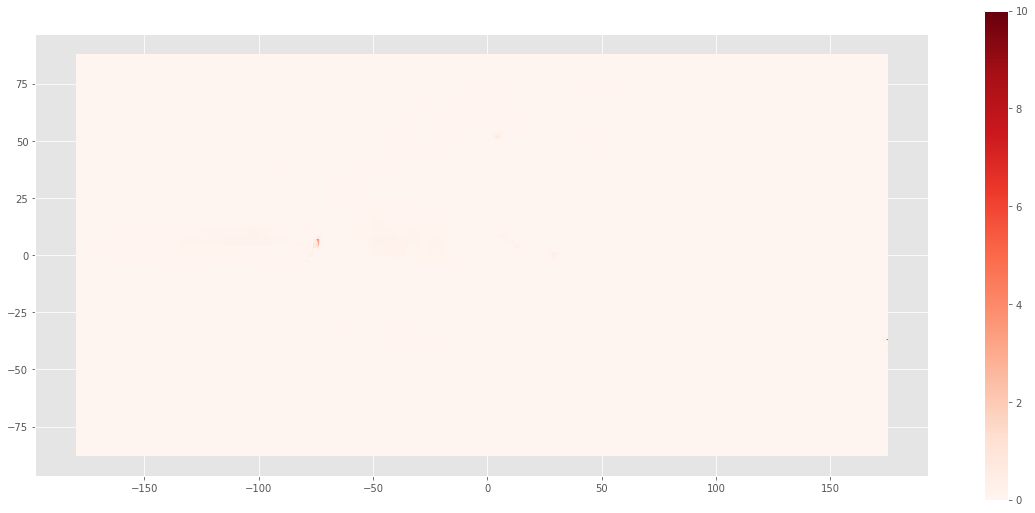

In [45]:
fig, ax = plt.subplots(1, 1)
mpl.rcParams['figure.figsize']=(20,9)
mpl.style.use('ggplot')
fraction.plot(linewidths=0,column='difference',ax=ax,legend=True,vmin=0, vmax=10,cmap = 'Reds')

<AxesSubplot:>

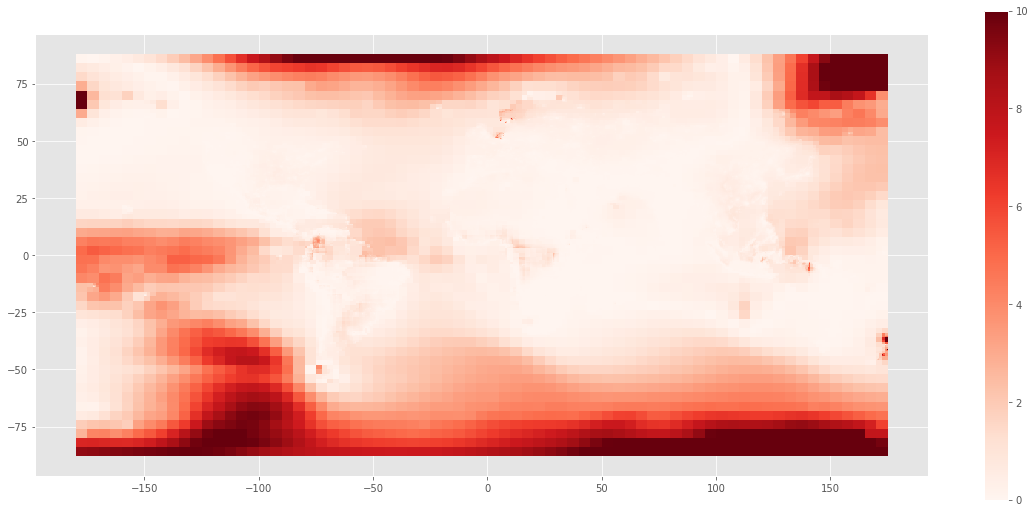

In [47]:
fig, ax = plt.subplots(1, 1)
mpl.rcParams['figure.figsize']=(20,9)
mpl.style.use('ggplot')
fraction.plot(linewidths=0,column='diff_percent',ax=ax,legend=True,vmin=0, vmax=10,cmap = 'Reds')